# **RAG Q&A chatbot**

### DATA LOADING

In [1]:
from google.colab import files
import pandas as pd
import io

# This will open a file upload dialog
print("Please upload the zip file you downloaded from Kaggle (e.g., 'archive.zip').")
uploaded = files.upload()

# Get the name of the uploaded file
zip_file_name = list(uploaded.keys())[0]

Please upload the zip file you downloaded from Kaggle (e.g., 'archive.zip').


Saving archive (1).zip to archive (1).zip


In [2]:
# Unzip the dataset
# The '-o' flag overwrites files without asking, which is useful for re-running cells
!unzip -o "{zip_file_name}"

# Now, load the dataset into a pandas DataFrame
# The CSV file inside the zip is 'Training Dataset.csv'
df = pd.read_csv('Training Dataset.csv')

Archive:  archive (1).zip
  inflating: Sample_Submission.csv   
  inflating: Test Dataset.csv        
  inflating: Training Dataset.csv    


In [4]:
# Display the first few rows to confirm it's loaded
print("\nDataset loaded successfully. Here are the first 5 rows:")
print(df.head())


Dataset loaded successfully. Here are the first 5 rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1        

<hr>

### Exploratory Data Analysis (EDA) and Visualization**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
print("\nNumerical Data Summary:")
print(df.describe())


Numerical Data Summary:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


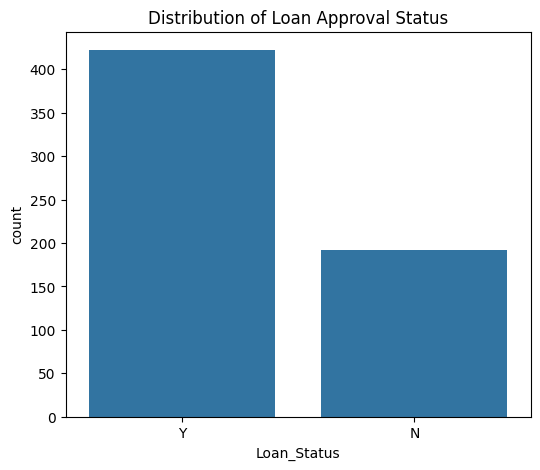

In [6]:
# Visualize the target variable: Loan_Status
plt.figure(figsize=(6, 5))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Approval Status')
plt.show()

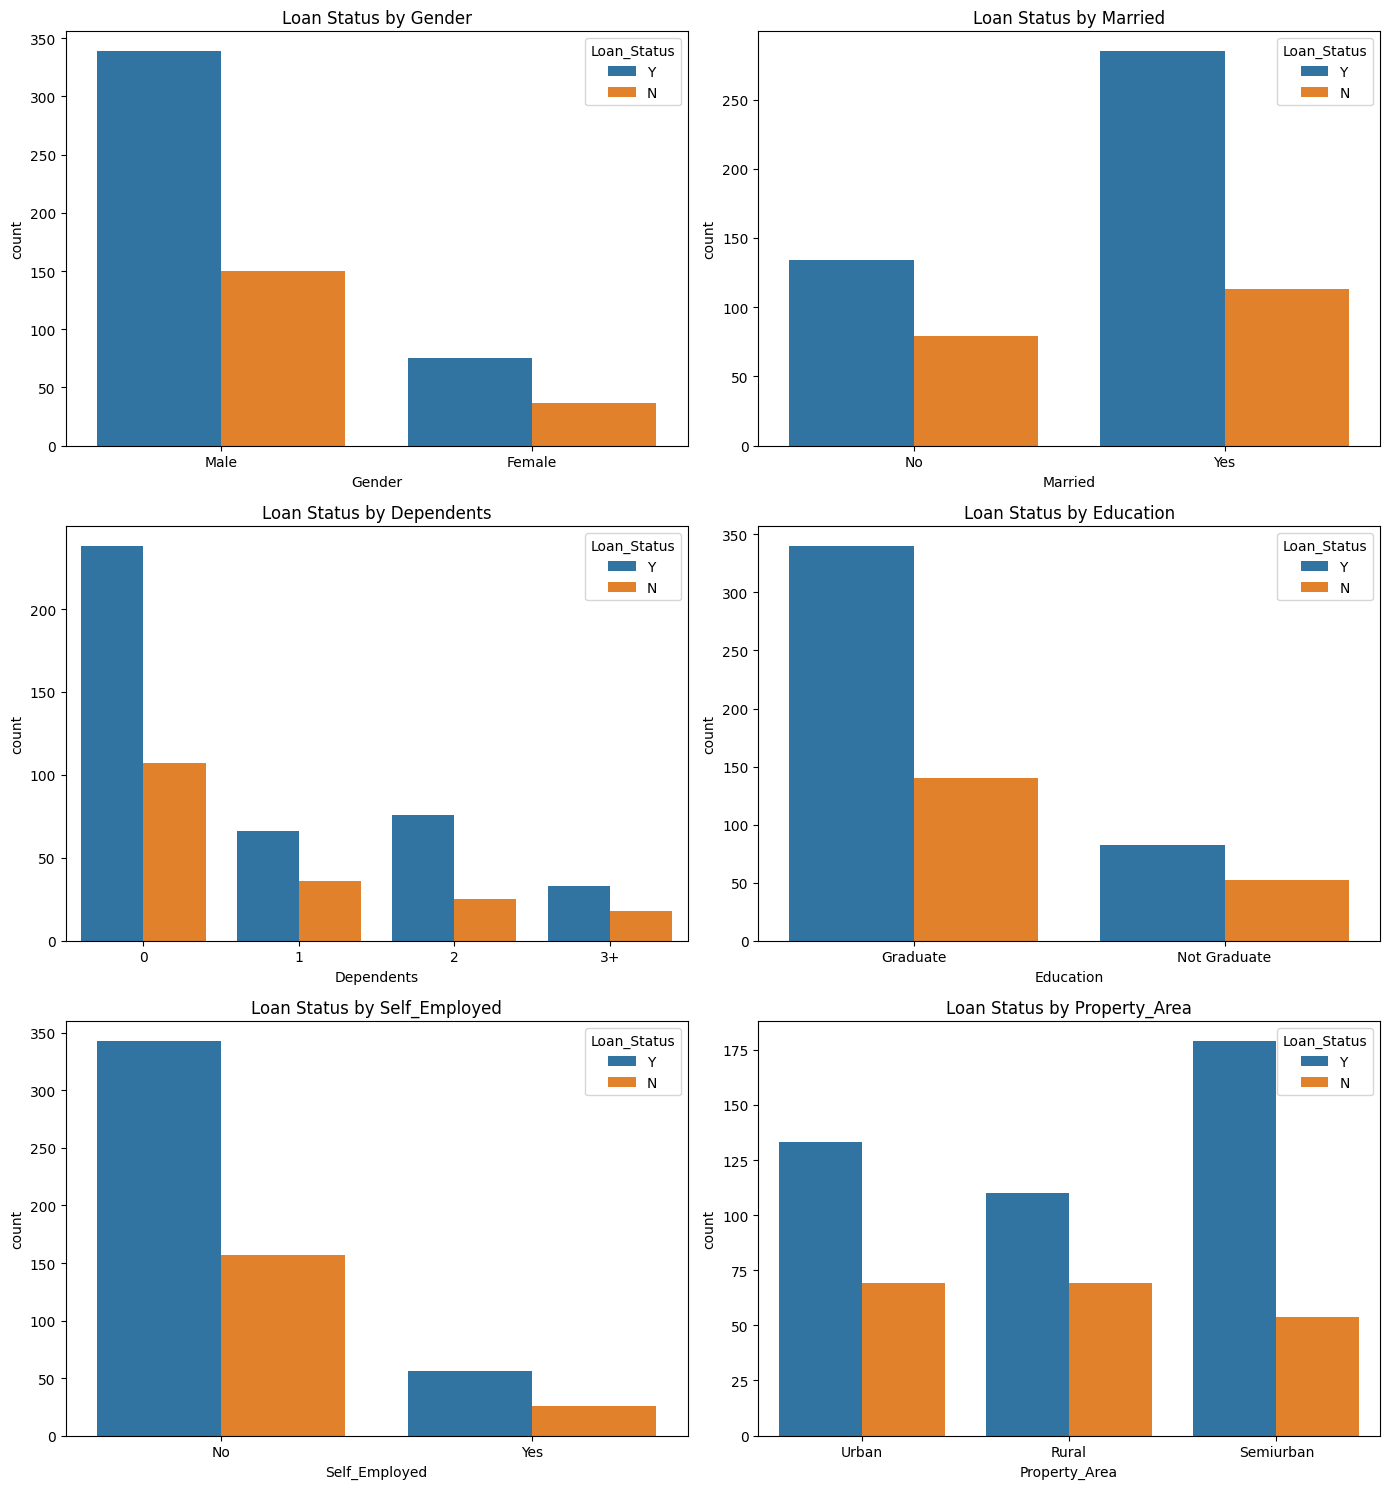

In [7]:
# Visualize categorical features against Loan_Status
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.ravel() # Flatten the axes array

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Loan_Status', data=df, ax=axes[i])
    axes[i].set_title(f'Loan Status by {col}')
plt.tight_layout()
plt.show()

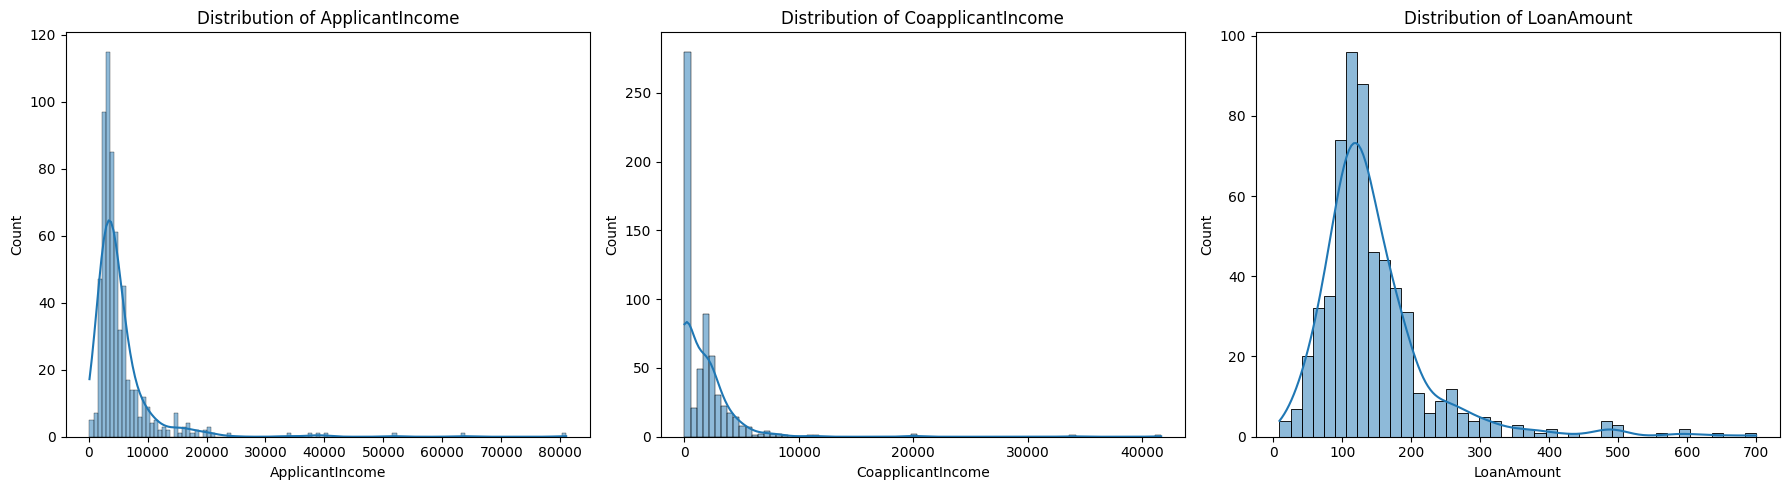

In [8]:
# Visualize numerical features distribution
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<hr>

###Data Cleaning and Preprocessing

In [11]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [12]:
import numpy as np

# --- Handling Missing Values ---
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

/tmp/ipython-input-12-3832631313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-12-3832631313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [13]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
# --- Feature Engineering & Transformation ---
df['ApplicantIncome_log'] = np.log(df['ApplicantIncome'] + 1)
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome'] + 1)
df['LoanAmount_log'] = np.log(df['LoanAmount'] + 1)
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_ID'], axis=1, inplace=True)

In [15]:
# --- Convert Categorical Features to Numbers ---
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nData after converting categories to numbers:")
print(df.head())


Data after converting categories to numbers:
   Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
0       1        0           0          0              0             360.0   
1       1        1           1          0              0             360.0   
2       1        1           0          0              1             360.0   
3       1        1           0          1              0             360.0   
4       1        0           0          0              0             360.0   

   Credit_History  Property_Area  Loan_Status  ApplicantIncome_log  \
0             1.0              2            1             8.674197   
1             1.0              0            0             8.430327   
2             1.0              2            1             8.006701   
3             1.0              2            1             7.857094   
4             1.0              2            1             8.699681   

   CoapplicantIncome_log  LoanAmount_log  
0               0.000

<hr>
<br>

### Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Define features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed successfully.")

Model training completed successfully.


<hr>

### Model Evaluation and Plotting

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 84.55%


In [24]:
# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.79      0.68      0.73        38
    Approved       0.87      0.92      0.89        85

    accuracy                           0.85       123
   macro avg       0.83      0.80      0.81       123
weighted avg       0.84      0.85      0.84       123



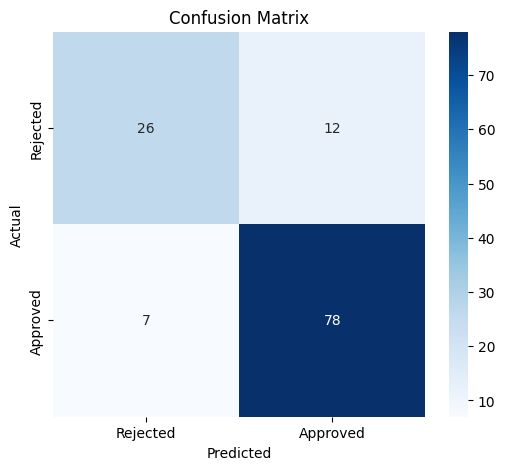

In [23]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<hr>

### Saving and Downloading the Model

In [27]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'loan_approval_model.joblib')
print("Model saved as 'loan_approval_model.joblib'")

# Automatically download the model file to your computer
files.download('loan_approval_model.joblib')


Model saved as 'loan_approval_model.joblib'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>